# Objectives
1. Hypothesis tests 
    - Hypothesis tests and z-score
    - P-value 
    - Statistical significance
2. Two-Sample and ANOVA Tests
    - t-tests
    - Calculating p_value from t-test
    - paried t-tests
    - ANOVA tests
3. Proportion test
    - One-sample proportion tests
    - Two sample proportion tests
    - Chi-square test of independence
    - Chi-square goodness of fit tests
4. Non-parametric tests
    - Parametric tests: assumptions, consequences and solutions
    - Non parametric tests: 
     - Wilcoxon-signed rank test: paired t-test
     - Wilcoxon-Mann_Whitney test (Mann Whitney U test): unpaired t-tests
     - Kruskal-Wallis test: ANOVA test

## 1. Introduction to Hypothesis Testing
- **A/B test**: control group and treatment group
- If the results from the A/B test statistically significant or just chance? - **Hypothesis test**
- z-score

### 1.1 Hypothesis tests and z-scores
- A hypothese
- Use sampling method to observe the mean and std of sampling: here we use bootstrap sampling 
- Use z-score to standarize the dataset 
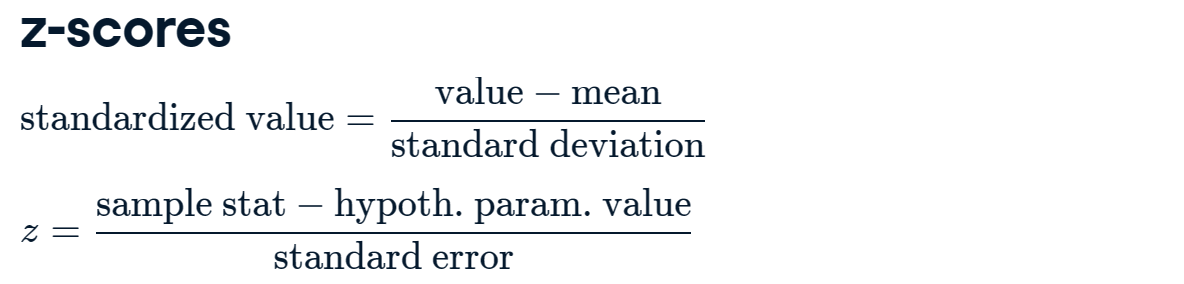
- Determine z-score is high or lower? 
> **Hypothesis testing use case:**
Determine whether sample statistics are close to or far away from expected (or 'hypothesized' values)
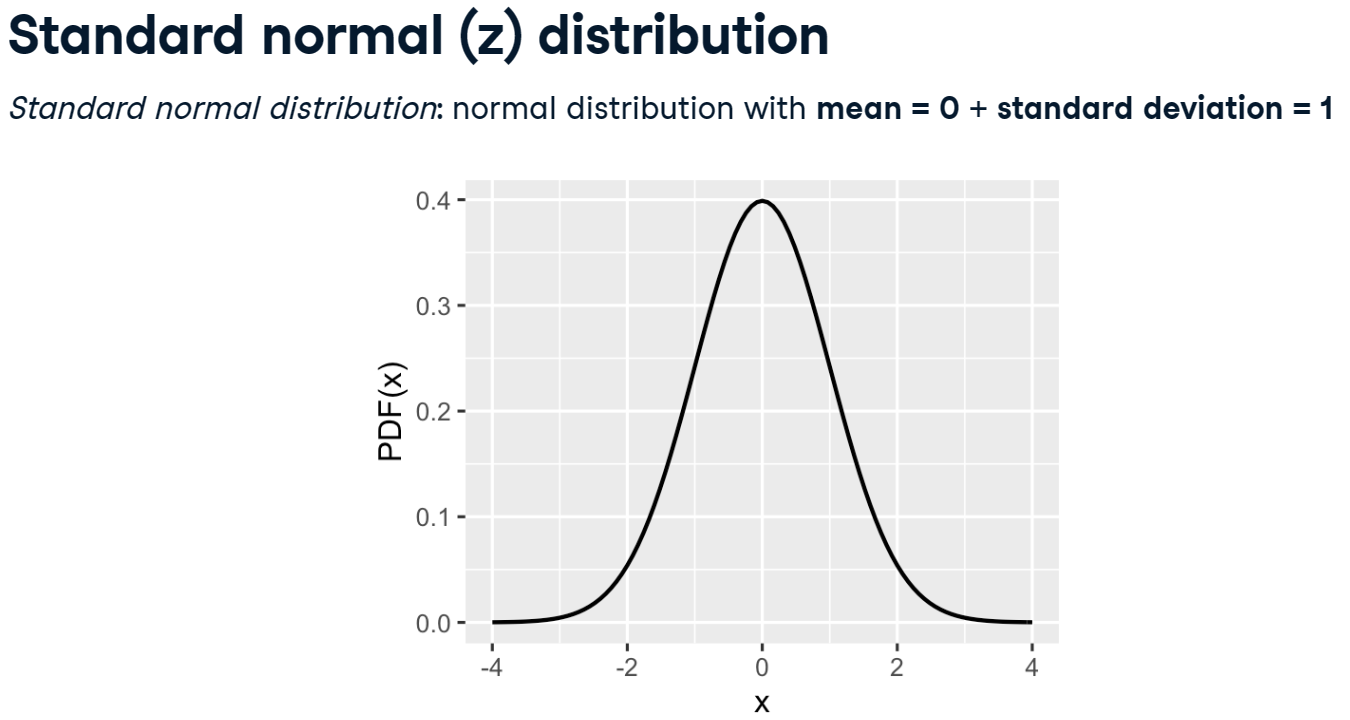

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Stack_overflow datasets**

In [2]:
stack_overflow = pd.read_feather('/QXJ/Python/Datacamp/Statistics/Hypothesis/stack_overflow.feather')
stack_overflow.head()

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28.0,At least 30
2,69.0,I am a developer by profession,Yes,25.0,12.0,child,Yearly,550000.0,594539.0,France,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask,Just as welcome now as I felt last year,40.0,13.0,3.0,Under 30
3,125.0,"I am not primarily a developer, but I write co...",Yes,41.0,30.0,adult,Monthly,200000.0,2000000.0,United States,...,Appropriate in length,No,None,None,None,Just as welcome now as I felt last year,40.0,11.0,11.0,At least 30
4,147.0,"I am not primarily a developer, but I write co...",No,28.0,15.0,adult,Yearly,50000.0,37816.0,Canada,...,Appropriate in length,No,"Another engineering discipline (such as civil,...",None,Express;Flask,Just as welcome now as I felt last year,40.0,5.0,3.0,Under 30


In [6]:
stack_overflow.columns.tolist()

['respondent',
 'main_branch',
 'hobbyist',
 'age',
 'age_1st_code',
 'age_first_code_cut',
 'comp_freq',
 'comp_total',
 'converted_comp',
 'country',
 'currency_desc',
 'currency_symbol',
 'database_desire_next_year',
 'database_worked_with',
 'dev_type',
 'ed_level',
 'employment',
 'ethnicity',
 'gender',
 'job_factors',
 'job_sat',
 'job_seek',
 'language_desire_next_year',
 'language_worked_with',
 'misc_tech_desire_next_year',
 'misc_tech_worked_with',
 'new_collab_tools_desire_next_year',
 'new_collab_tools_worked_with',
 'new_dev_ops',
 'new_dev_ops_impt',
 'new_ed_impt',
 'new_job_hunt',
 'new_job_hunt_research',
 'new_learn',
 'new_off_topic',
 'new_onboard_good',
 'new_other_comms',
 'new_overtime',
 'new_purchase_research',
 'purple_link',
 'newso_sites',
 'new_stuck',
 'op_sys',
 'org_size',
 'platform_desire_next_year',
 'platform_worked_with',
 'purchase_what',
 'sexuality',
 'so_account',
 'so_comm',
 'so_part_freq',
 'so_visit_freq',
 'survey_ease',
 'survey_length',


- **A hypothesis**: 
> The mean annual compensation of the population of data scientists is 110,000 usd

In [13]:
# calculate sample mean - the point  estimate
mean_comp_samp = stack_overflow['converted_comp'].mean()
print(format(np.round(mean_comp_samp),','))

119,575.0


In [15]:
# generate a bootstrap distribution
so_boot_distn = []

for i in range(5000):
    so_boot_distn.append(
        np.mean(
            stack_overflow.sample(frac = 1, replace = True)['converted_comp']
        )
    )

so_boot_distn[:10],

([122740.92923485184,
  123410.56523662097,
  128453.50464396285,
  120492.1494913755,
  121910.25033171164,
  123953.83635559487,
  135591.79389650596,
  124141.6143299425,
  112799.76780185758,
  126933.92171605484],)

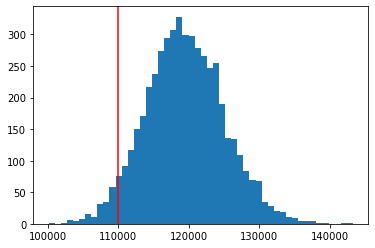

In [18]:
plt.hist(so_boot_distn, bins = 50)
plt.axline(xy1 =(110000,0), xy2=(110000, 300), color ='red')
plt.show()

In [19]:
std_error = np.std(so_boot_distn, ddof = 1)
std_error

5549.291455636445

**Use Z-score to standarize the values**
> standardized value = (value - mean)/standard deviation

In [20]:
# calculate the z-score 
mean_camp_hyp = 110000
z_score = (mean_comp_samp - mean_camp_hyp)/std_error
print('Is',z_score,'a high or low number?')

Is 1.7253945766291354 a high or low number?


**late shipment dataset**

In [6]:
path = '/QXJ/Python/Datacamp/Statistics/Hypothesis/late_shipments.feather'
late_shipments = pd.read_feather(path)
late_shipments.head()

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,...,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,...,2996.0,266644.00,89.00,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,25.0,800.00,32.00,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72
2,69871.0,Vietnam,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Adult,...,22925.0,110040.00,4.80,0.08,Hetero Unit III Hyderabad IN,Yes,3723.0,19056.13,expensive,181.57
3,17648.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,...,152535.0,361507.95,2.37,0.04,"Aurobindo Unit III, India",Yes,7698.0,11372.23,expensive,779.41
4,5647.0,Uganda,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test - Ancillary,...,850.0,8.50,0.01,0.00,Inverness Japan,Yes,56.0,360.00,reasonable,0.01


In [23]:
late_shipments.shape

(1000, 27)

In [64]:
# equal proportion sampling
shipments_samp = late_shipments.sample(frac = 0.25, random_state = 1)
late_samp = shipments_samp['late'].value_counts(normalize = True)
late_prop_sample = late_samp.iloc[1]
late_prop_sample

0.068

In [56]:
late_prop_samp  = 0.068

In [67]:
# bootstrapping sampling 
late_shipments_boot_distn = []

for i in range(250):
    late_shipments_boot_distn.append(
        shipments_samp.sample(frac = 1, replace = True)['late'].value_counts(normalize = True)[1]
    )
    
late_shipments_boot_distn

[0.06,
 0.072,
 0.044,
 0.068,
 0.06,
 0.072,
 0.036,
 0.052,
 0.056,
 0.064,
 0.12,
 0.064,
 0.088,
 0.064,
 0.064,
 0.056,
 0.076,
 0.064,
 0.064,
 0.08,
 0.06,
 0.06,
 0.096,
 0.056,
 0.056,
 0.076,
 0.08,
 0.12,
 0.076,
 0.06,
 0.056,
 0.056,
 0.068,
 0.068,
 0.064,
 0.068,
 0.044,
 0.048,
 0.056,
 0.064,
 0.092,
 0.072,
 0.056,
 0.068,
 0.092,
 0.044,
 0.076,
 0.044,
 0.076,
 0.068,
 0.044,
 0.088,
 0.08,
 0.056,
 0.056,
 0.072,
 0.084,
 0.08,
 0.072,
 0.048,
 0.052,
 0.064,
 0.052,
 0.076,
 0.044,
 0.092,
 0.048,
 0.052,
 0.068,
 0.092,
 0.072,
 0.068,
 0.084,
 0.068,
 0.072,
 0.084,
 0.076,
 0.092,
 0.084,
 0.068,
 0.048,
 0.088,
 0.072,
 0.088,
 0.06,
 0.06,
 0.048,
 0.048,
 0.052,
 0.068,
 0.076,
 0.088,
 0.08,
 0.072,
 0.08,
 0.052,
 0.076,
 0.076,
 0.088,
 0.096,
 0.068,
 0.06,
 0.068,
 0.052,
 0.072,
 0.084,
 0.072,
 0.092,
 0.084,
 0.088,
 0.052,
 0.076,
 0.052,
 0.06,
 0.06,
 0.084,
 0.052,
 0.068,
 0.076,
 0.064,
 0.064,
 0.06,
 0.072,
 0.036,
 0.06,
 0.088,
 0.048,
 0.0

**Hypothesis: the proportion of late shipments is 6%**

In [49]:
std_error

1.3877787807814457e-17

In [72]:
# Hypothesize that the proportion is 6%
late_prop_hyp = 0.06

# Calculate the standard error
std_error = np.std(late_shipments_boot_distn, ddof = 1)

# Find z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp)/std_error

# Print z_score
z_score

0.5035771823791204

### 1.2 P-value
- A hypothese test has two competing hypotheses: H0 and Ha
 - H0: the existing idea
 - Ha: the new 'challenger' idea of the researcher
- Intially, H0 is assumed to be true
- The test ends in either 'reject H0' or 'fail to reject H0'
- **Reject H0** when the evidence from the sample is **significant**.
- **P value**: Probability of obtaining a result, assuming the H0 is true.
- **norm.cdf()**: culmulative density function from scipy.stats
 - Left-tailed test: norm.cdf(z_score, loc, scale)
 - Right-tailed test: 1 - norm.cdf(z_score, loc, scale)
>*Significance level* is "beyond or reasonable doubt" for hypothesis test. 
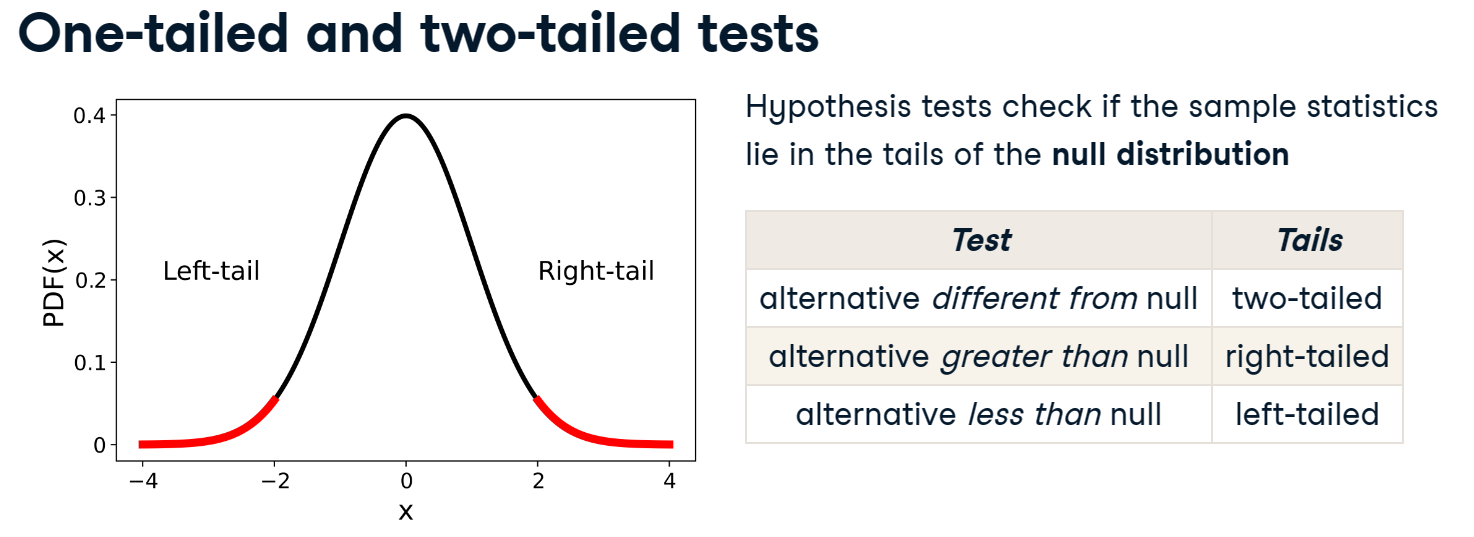
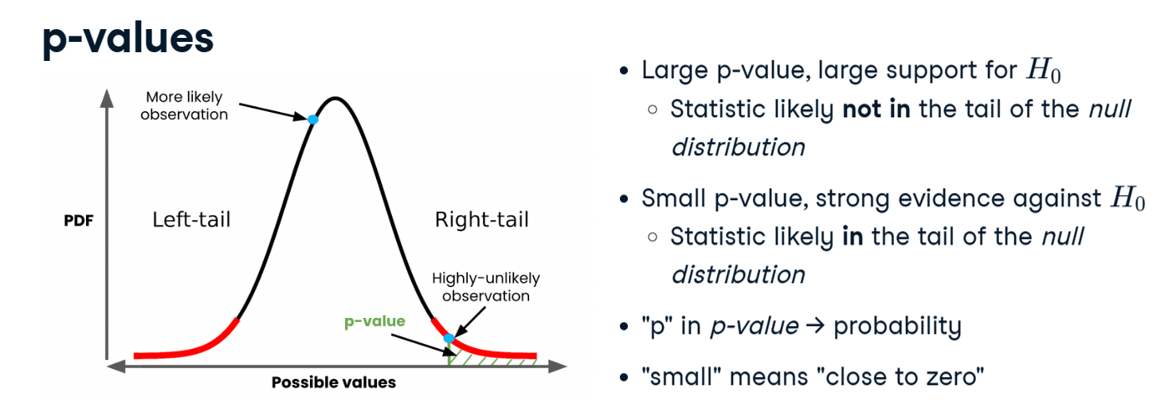

In [61]:
stack_overflow['age_first_code_cut'].unique()

array(['adult', 'child'], dtype=object)

*Previous research: 35% of software developers started programming as children*
- **H0: The proportion of data scientists starting programming as children is 35%**
- **Ha: The proportion of data scientists starting programming as children is great than 35%**

> **H0**: 80% of developers is middle age (from 25 to 54 yrs old)
<br>
> **Ha**: more than 80% of developers is middle age -> **right tail test**

In [71]:
prop_child_samp = (stack_overflow['age_first_code_cut'] == 'child').mean()
prop_child_samp

0.39141972578505085

In [76]:
first_code_boot_distn=[]
for i in range(1000):
    first_code_boot_distn.append(
    stack_overflow.sample(frac = 1, replace = True)['age_first_code_cut'].value_counts(normalize = True)[1])
first_code_boot_distn[:5]

[0.38390092879256965,
 0.36620964175143744,
 0.39451570101724903,
 0.38965059708093763,
 0.38567005749668287]

In [77]:
std_error = np.std(first_code_boot_distn, ddof = 1)
std_error

0.010287719159871941

In [81]:
# calcualte z-score 
prop_child_hyp = 0.35
z_score = (prop_child_samp - prop_child_hyp)/std_error
print('Is',z_score,'a high or low number?')

Is 4.026133017570287 a high or low number?


In [82]:
# calculate p-value
from scipy.stats import norm
p_value = 1 - norm.cdf(z_score, loc = 0, scale = 1)
p_value

# p < 0.05, reject H0

2.8350810609700794e-05

### 1.3 Statistical significance
- P-values quantify evidence for the null hypothesis
- Large P-value -> fail to reject H0
- Smaller P-value -> reject H0
- **Cutoff point**: The **significance level** of a hypothesis test(α) is the threshold point for "beyond a reasonable doubt"
 - Common values of α are **0.2, 0.1, 0.05, 0.01**
 - If p <= α, reject H0, else fail to reject H0
 - α should be set **prior** to conducting the hypothesis test
- A confidence interval level of α is **1-α**, such as α = 0.05 -> 95% confidence level
 - using np.quantile(array, 0.025/0.975) to calculate CI
- Types of errors: 
> 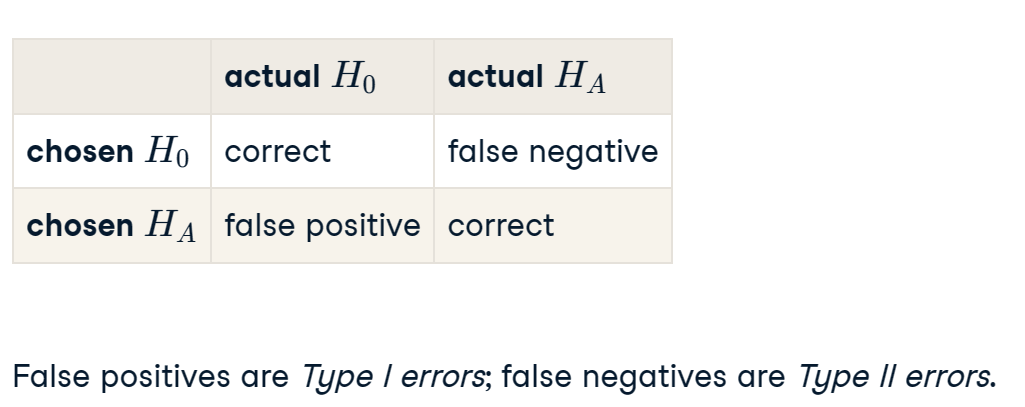

In [302]:
# add α to the last test 
# calculate p-values: one proportion vs. a value
alpha = 0.05
print(p_value)

1.3156598033248201e-10


In [305]:
# result 
if p_value <= alpha:
    print('reject H0, in favor of Ha')
else:
    print('fail to reject H0, in favor of H0')

reject H0, in favor of Ha


> **H0**: 80% of developers is middle age (from 25 to 54 yrs old)
<br>
> **Ha**: more than 80% of developers is middle age -> **right tail test**

In [83]:
# calculate confidence level
lower = np.quantile(first_code_boot_distn, 0.025)
upper = np.quantile(first_code_boot_distn, 0.975)
print((lower, upper))
# 80% is not included into the CI, reject H0, in favor of Ha. 

(0.3706214064573198, 0.410891198584697)


## 2. Two-Sample and ANOVA Tests
- t-tests
- Calculating p_value from t-test
- paried t-tests
- ANOVA tests

### 2.1 Performing t-test
- Two-sample problems
- Use sample mean to replace the population mean
- t-distribution: has a df 
  > 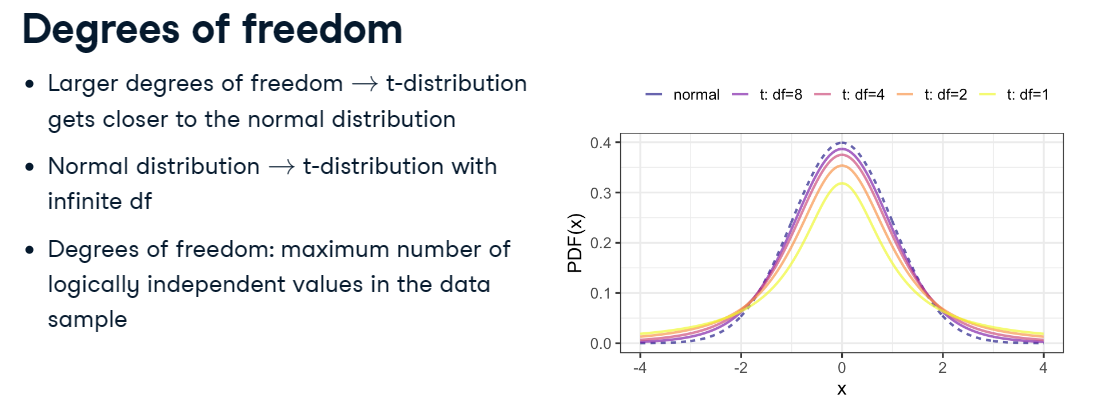

**Are users who first programming as a child compensated higher than those that started as adults?** -> compare the population mean 

- **H0: The mean compensation (in USD) is the same for those that coded first as a child and those that coded first as an adult**
  - xbar_child - xbar_adult = 0
- **Ha: The mean compensation (in USD) is greater for those that coded first as a child and those that coded first as an adult**
  - xbar_child - xbar_adult > 0 
- a test statistic: x_bar_child - x_bar_adult
- z-score: a (standardized) test statistic

**stack_overflow dataset**

In [90]:
mean_first_code_comp = stack_overflow.groupby('age_first_code_cut')['converted_comp'].mean()
xbar_child = mean_first_code_comp[1]
xbar_adult = mean_first_code_comp[0]

In [91]:
s_first_code_comp = stack_overflow.groupby('age_first_code_cut')['converted_comp'].std()
s_child = s_first_code_comp[1]
s_adult = s_first_code_comp[0]

In [92]:
n_first_code_comp = stack_overflow.groupby('age_first_code_cut')['converted_comp'].count()
n_child = n_first_code_comp[0]
n_adult = n_first_code_comp[1]

In [93]:
numerator = xbar_child - xbar_adult
denominator = np.sqrt(s_child**2/n_child + s_adult**2/n_adult)
t_stat = numerator / denominator
t_stat

1.8455216553097114

*To answer next: Is that increase statistically significant or could it be complained by sampling varability?*
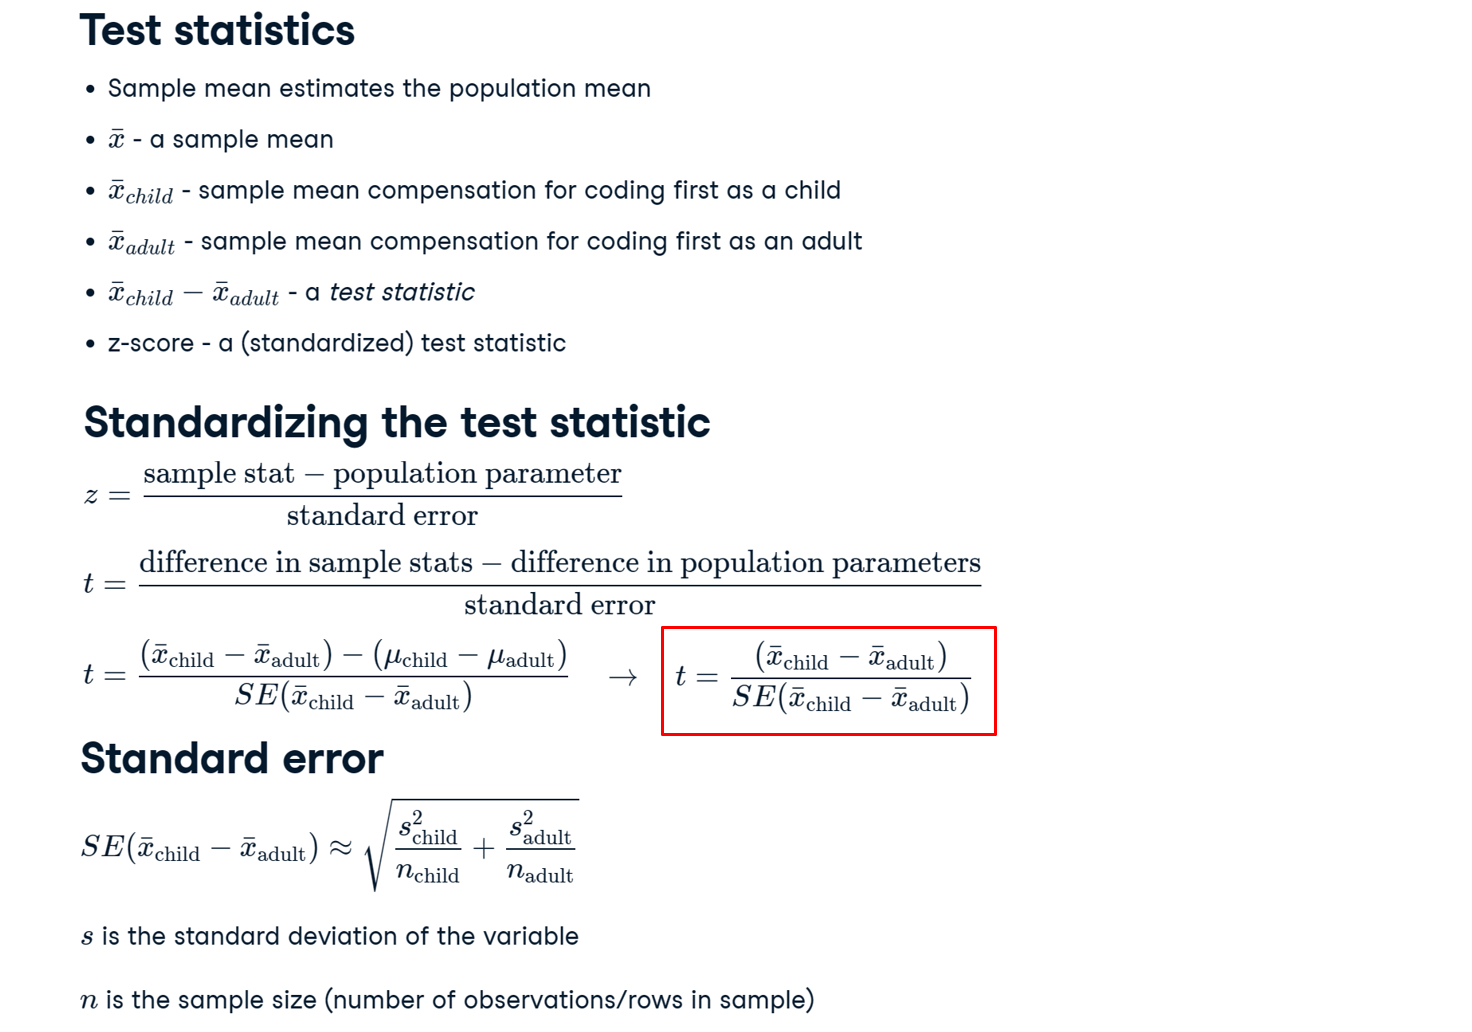

**last_shipments dateset**
- The hypothesis test for determining if there is a difference between the means of two populations

In [9]:
mean_late_weight = late_shipments.groupby('late')['weight_kilograms'].mean()
mean_late_weight

late
No     1897.791267
Yes    2715.672131
Name: weight_kilograms, dtype: float64

In [10]:
std_late_weight = late_shipments.groupby('late')['weight_kilograms'].std()
std_late_weight

late
No     3154.039507
Yes    2544.688211
Name: weight_kilograms, dtype: float64

In [11]:
n_late_weight = late_shipments.groupby('late')['weight_kilograms'].count()
n_late_weight

late
No     939
Yes     61
Name: weight_kilograms, dtype: int64

In [12]:
xbar_no = mean_late_weight[0]
xbar_yes = mean_late_weight[1]
s_no = std_late_weight[0]
s_yes = std_late_weight[1]
n_no = n_late_weight[0] 
n_yes = n_late_weight[1] 

In [19]:
t_stats = (xbar_no - xbar_yes)/np.sqrt(s_no**2/n_no + s_yes**2/n_yes)
t_stats

-2.3936661778766433

In [20]:
from scipy.stats import norm
p_value = norm.cdf(t_stats)/2
p_value

0.004170230755050542

### 2.2 Calculating p-values from t-statistics
- t-statistic follows a t-ditribution
    - t-distribution has a parameter called degree of freedem(df)
    - Larger degrees of freedom, t-distribution gets closer to the normal distribution 
    - Normal distribution -> t-distribution with infinite df 
- z-statistics: needed when using **one sample statistic** to estimate a population parameter
- t-statistics: needed when using **multiple sample statistics** to estimate a population parameter
    - **df = n1+n2-2**: maximun number of logically independent values in the data sample
    - Use **t-distribution CDF**, not normal CDF
    >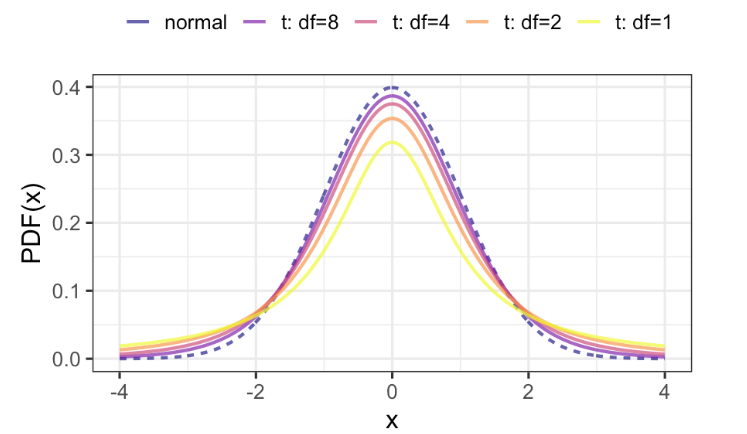

**Define siginifcant level: α**
<br>
α = 0.1
<br>
if p <= α then reject H0

In [ ]:
df = n[0] + n[1] -2
df

In [ ]:
# calculate p-values: one proportion vs. a value
from scipy.stats import t
p_value = 1 - t.cdf(t_stats, df)
p_value

In [354]:
# result 
if p_value <= alpha:
    print('reject H0, in favor of Ha')
else:
    print('fail to reject H0, in favor of H0')
# The developers who have above 9 yrs of coding experience earn more than those under 9 yrs.

reject H0, in favor of Ha


*Using a sample standard deviation to estimate the standard error is computationally easier than using bootstrapping. However, to correct for the approximation, you need to use a t-distribution when transforming the test statistic to get the p-value.*

**- H0: The mean weight of shipments that weren't late is the same as the mean weight of shipments that were late.**

**- Ha: The mean weight of shipments that weren't late is less than the mean weight of shipments that were late.**

In [22]:
# Calculate the degrees of freedom
degrees_of_freedom = n_no + n_yes -2 

# Calculate the p-value from the test stat
p_value = t.cdf(t_stats, degrees_of_freedom)

# Print the p_value
print(p_value)

0.008432382146249523


### 2.3 Paired  t-tests
- Data is **paired** -> each voter percentage refers to the same characteristic, such as same country
 - want to capture patten of the pairs, such as voting pattern in model
>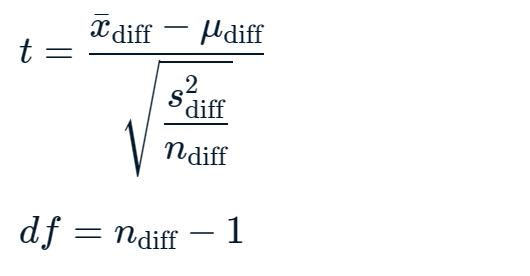

*Below test's sample size is too small, should use non-parametric test. Here is only demenstrate the proceure to use paired t-test.*

In [75]:
repub_votes_potus_08_12 = pd.read_feather('/QXJ/Python/Datacamp/Statistics/Hypothesis/repub_votes_potus_08_12.feather')
repub_votes_potus_08_12.head()

,state,county,repub_percent_08,repub_percent_12
0,Alabama,Hale,38.957877,37.139882
1,Arkansas,Nevada,56.726272,58.983452
2,California,Lake,38.896719,39.331367
3,California,Ventura,42.923190,45.250693
4,Colorado,Lincoln,74.522569,73.764757


**Question: was the % of republican candidate votes lower in 2008 than 2012?**
>**H0**:S2008 - S2012 = 0 -> μ2008 - μ2012 = 0 -> μdiff = 0
<br>
**Ha**: S2008 - S2012 > 0 -> μ2008 - μ2012 > 0 -> μdiff > 0
<br>
set α = 0.05 siginificance level
- Data is **paired** -> each voter percentage refer to the same country

In [21]:
sample_data = repub_votes_potus_08_12

In [22]:
sample_data['diff'] = sample_data['repub_percent_08'] - sample_data['repub_percent_12']

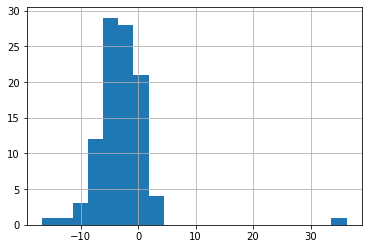

In [23]:
sample_data['diff'].hist(bins=20)
plt.show()

In [25]:
xbar_diff = sample_data['diff'].mean()
xbar_diff

-2.8771090412429454

**New hypotheses:**
> H0: μdiff = 0
<br>
Ha: μdiff < 0 

In [27]:
n_diff = len(sample_data)
df = n_diff -1 
df 

99

In [28]:
s_diff = sample_data['diff'].std()
t_stat = (xbar_diff - 0)/np.sqrt(s_diff**2/n_diff)
t_stat

-5.601043121928492

In [29]:
from scipy.stats import t
p_value = t.cdf(t_stat, df)
p_value

9.572537285272304e-08

In [31]:
# result 
alpha = 0.5
if p_value <= alpha:
    print('reject H0, in favor of Ha')
else:
    print('fail to reject H0, in favor of H0')

reject H0, in favor of Ha


**Testing differences between two mean using ttest()**

In [34]:
import pingouin
pingouin.ttest(x=sample_data['diff'],
               # H0 
              y = 0, 
               # Ha
              alternative = 'less')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,less,9.572537e-08,"[-inf, -2.02]",0.560104,1.323e+05,1.0


In [33]:
# another way to calculate paried test instead of caculating difference
pingouin.ttest(x = sample_data['repub_percent_08'],
               y = sample_data['repub_percent_12'], 
               # True as default 
               paired = True, 
               alternative = 'less')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,less,9.572537e-08,"[-inf, -2.02]",0.217364,1.323e+05,0.696338


### 2.4 ANOVA tests
- **A test for differences between groups**
- If the derived test p_value < alpha, which means there are a significant different between at least two of the groups.
- If the result is significant, use pingouin pairwise test 
- Add correction method to the test 
- p_value is below alpha, there is a significant difference among the those pairs

**stack overflow dataset**

*Want to compare the top 4 devTypes*

In [35]:
stack_overflow['job_sat'].value_counts()

Very satisfied           879
Slightly satisfied       680
Slightly dissatisfied    342
Neither                  201
Very dissatisfied        159
Name: job_sat, dtype: int64

**If mean annual compensation different for different levels of job satisfaction?**

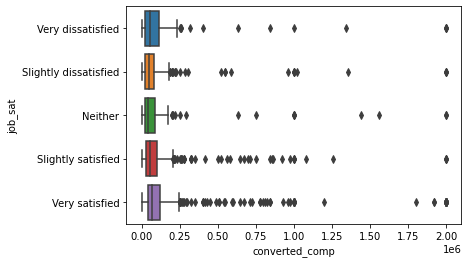

In [37]:
# visualize the numerical+categorical data with boxplot
sns.boxplot(x= 'converted_comp' , y='job_sat',data = stack_overflow)
plt.show()

In [4]:
OUTDATED_IGNORE=1 

In [5]:
alpha = 0.2
import pingouin
pingouin.anova(data = stack_overflow,
              dv = 'converted_comp',
              between = 'job_sat')

,Source,ddof1,ddof2,F,p-unc,np2
0,job_sat,4,2256,4.480485,0.001315,0.007882


> 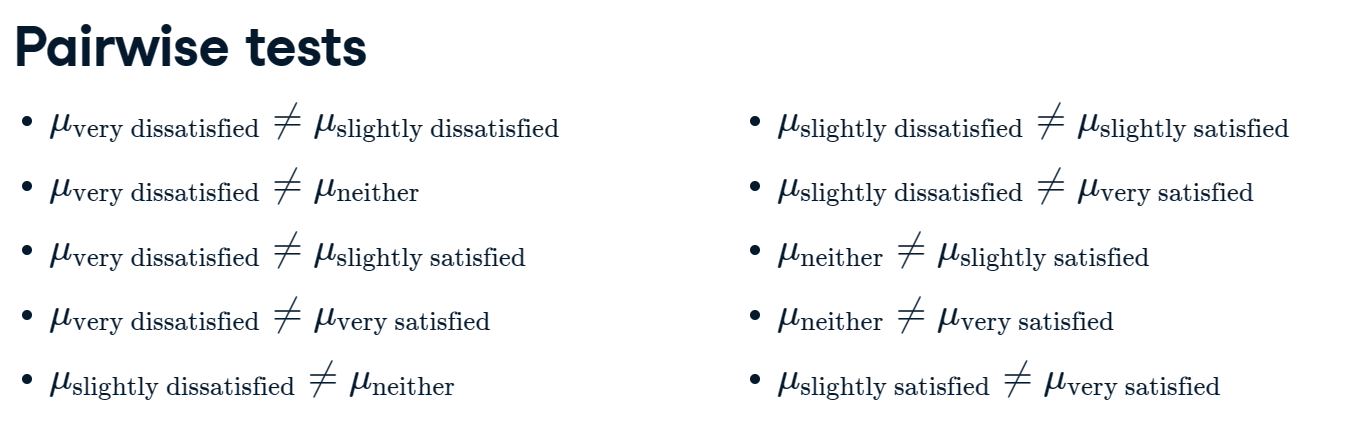
**At 20 groups, it is almost garanteed you will get 1 case of false positive - type error I -> Bonferroni correction**
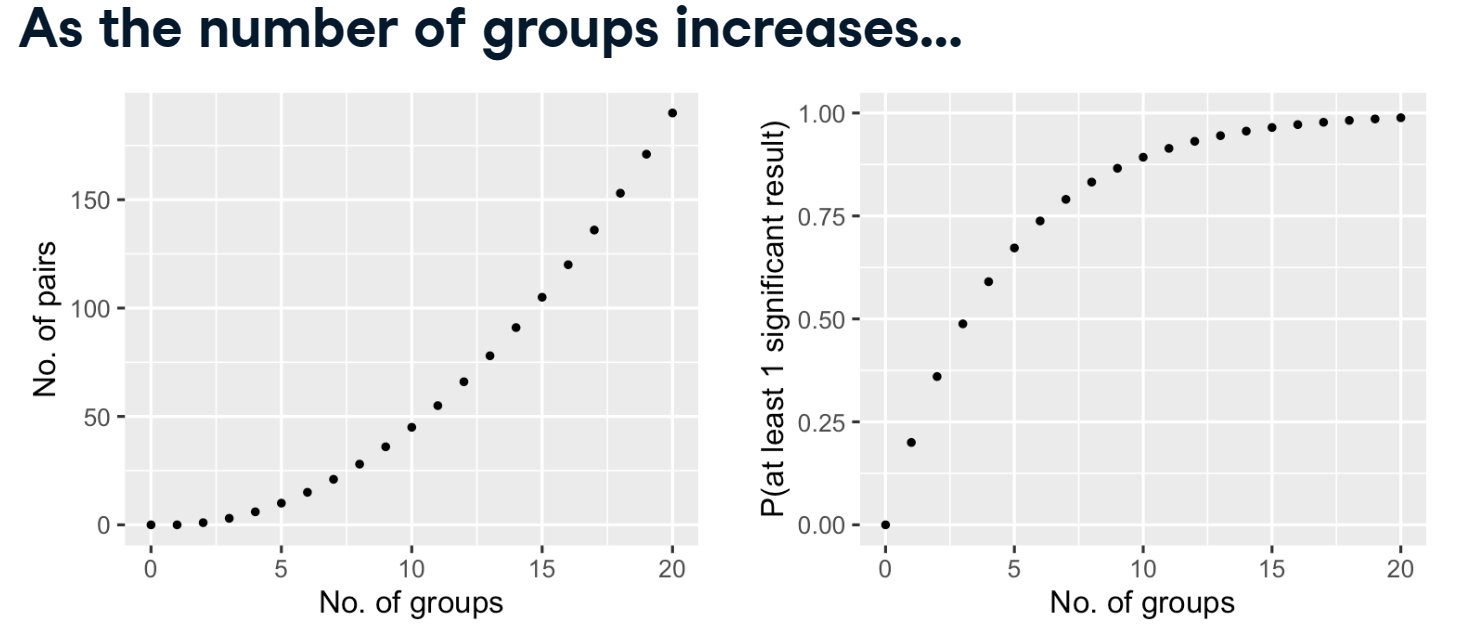

In [6]:
pingouin.pairwise_tests(data = stack_overflow,
                       dv = 'converted_comp',
                       between = 'job_sat',
                       padjust = 'none')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,job_sat,Slightly satisfied,Very satisfied,False,True,-4.009935,1478.622799,two-sided,0.000064,158.564,-0.192931
1,job_sat,Slightly satisfied,Neither,False,True,-0.700752,258.204546,two-sided,0.484088,0.114,-0.068513
2,job_sat,Slightly satisfied,Very dissatisfied,False,True,-1.243665,187.153329,two-sided,0.215179,0.208,-0.145624
3,job_sat,Slightly satisfied,Slightly dissatisfied,False,True,-0.038264,569.926329,two-sided,0.969491,0.074,-0.002719
4,job_sat,Very satisfied,Neither,False,True,1.662901,328.326639,two-sided,0.097286,0.337,0.120115
5,job_sat,Very satisfied,Very dissatisfied,False,True,0.747379,221.666205,two-sided,0.455627,0.126,0.063479
6,job_sat,Very satisfied,Slightly dissatisfied,False,True,3.076222,821.303063,two-sided,0.002166,7.43,0.173247
7,job_sat,Neither,Very dissatisfied,False,True,-0.545948,321.165726,two-sided,0.585481,0.135,-0.058537
8,job_sat,Neither,Slightly dissatisfied,False,True,0.602209,367.730081,two-sided,0.547406,0.118,0.055707
9,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.129951,247.570187,two-sided,0.259590,0.197,0.119131


*With the groups increase, the chance of  the significance level increases. Thus, we use **padjust** parameter to adject P-value, decreasing the chance of false positive.*

In [7]:
# bonferoni correction
pingouin.pairwise_tests(data = stack_overflow,
                       dv = 'converted_comp',
                       between = 'job_sat',
                       padjust = 'bonf')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,job_sat,Slightly satisfied,Very satisfied,False,True,-4.009935,1478.622799,two-sided,0.000064,0.000638,bonf,158.564,-0.192931
1,job_sat,Slightly satisfied,Neither,False,True,-0.700752,258.204546,two-sided,0.484088,1.000000,bonf,0.114,-0.068513
2,job_sat,Slightly satisfied,Very dissatisfied,False,True,-1.243665,187.153329,two-sided,0.215179,1.000000,bonf,0.208,-0.145624
3,job_sat,Slightly satisfied,Slightly dissatisfied,False,True,-0.038264,569.926329,two-sided,0.969491,1.000000,bonf,0.074,-0.002719
4,job_sat,Very satisfied,Neither,False,True,1.662901,328.326639,two-sided,0.097286,0.972864,bonf,0.337,0.120115
5,job_sat,Very satisfied,Very dissatisfied,False,True,0.747379,221.666205,two-sided,0.455627,1.000000,bonf,0.126,0.063479
6,job_sat,Very satisfied,Slightly dissatisfied,False,True,3.076222,821.303063,two-sided,0.002166,0.021659,bonf,7.43,0.173247
7,job_sat,Neither,Very dissatisfied,False,True,-0.545948,321.165726,two-sided,0.585481,1.000000,bonf,0.135,-0.058537
8,job_sat,Neither,Slightly dissatisfied,False,True,0.602209,367.730081,two-sided,0.547406,1.000000,bonf,0.118,0.055707
9,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.129951,247.570187,two-sided,0.259590,1.000000,bonf,0.197,0.119131


**late shipments dataset**

 *how the price of each package (pack_price) varies between the three shipment modes (shipment_mode): "Air", "Air Charter", and "Ocean".*

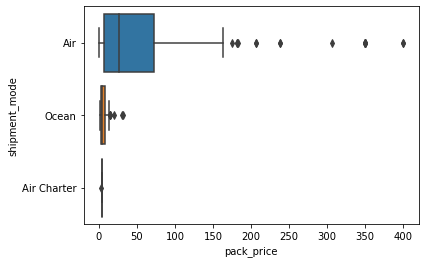

In [23]:
# Calculate the mean pack_price for each shipment_mode
xbar_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].mean()

# Calculate the standard deviation of the pack_price for each shipment_mode
s_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].std()

# Boxplot of shipment_mode vs. pack_price
sns.boxplot(x='pack_price',y='shipment_mode',data =late_shipments)
plt.show()

In [25]:
import pingouin

# Run an ANOVA for pack_price across shipment_mode
anova_results = pingouin.anova(data = late_shipments,
dv='pack_price', between = 'shipment_mode')

# Print anova_results
print(anova_results)

          Source  ddof1  ddof2        F         p-unc       np2
0  shipment_mode      2    997  21.8646  5.089479e-10  0.042018


In [26]:
# Perform a pairwise t-test on pack price, grouped by shipment mode
pairwise_results = pingouin.pairwise_tests(data = late_shipments,
dv ='pack_price', between ='shipment_mode', padjust = 'none')

# Print pairwise_results
print(pairwise_results)

        Contrast            A            B  Paired  Parametric          T  \
0  shipment_mode          Air  Air Charter   False        True  21.179625   
1  shipment_mode          Air        Ocean   False        True  19.335760   
2  shipment_mode  Air Charter        Ocean   False        True  -3.170654   

          dof alternative         p-unc       BF10    hedges  
0  600.685682   two-sided  8.748346e-75  5.809e+76  0.726592  
1  986.979785   two-sided  6.934555e-71  1.129e+67  0.711119  
2   35.615026   two-sided  3.123012e-03     15.277 -0.423775  


In [27]:
# Modify the pairwise t-tests to use Bonferroni p-value adjustment
pairwise_results = pingouin.pairwise_tests(data=late_shipments, 
                                           dv="pack_price",
                                           between="shipment_mode",
                                           padjust="bonf")

# Print pairwise_results
print(pairwise_results)

        Contrast            A            B  Paired  Parametric          T  \
0  shipment_mode          Air  Air Charter   False        True  21.179625   
1  shipment_mode          Air        Ocean   False        True  19.335760   
2  shipment_mode  Air Charter        Ocean   False        True  -3.170654   

          dof alternative         p-unc        p-corr p-adjust       BF10  \
0  600.685682   two-sided  8.748346e-75  2.624504e-74     bonf  5.809e+76   
1  986.979785   two-sided  6.934555e-71  2.080367e-70     bonf  1.129e+67   
2   35.615026   two-sided  3.123012e-03  9.369037e-03     bonf     15.277   

     hedges  
0  0.726592  
1  0.711119  
2 -0.423775  


## 3. Proportion test
- One-sample proportion tests
- Two sample proportion tests
- Chi-square test of independence
- Chi-square goodness of fit tests

*"Ocean" and "Air Charter"; "Ocean" and "Air"; "Air Charter" and "Air".*

### 3.1 One-sample proportion tests
- standardized test statistic for proportions
 - p: population proportion(unknown population parameter)
 - p_hat: sample proportion(sample statistic)
 - p0: hypothesized population proportion 
- why use z instead of t? 
 - t-distribution provides extra caution against mistakenly  rejectiing H0
 - However, in proportion test, we only use p_hat, so it is not need to use t-distribution 
 > 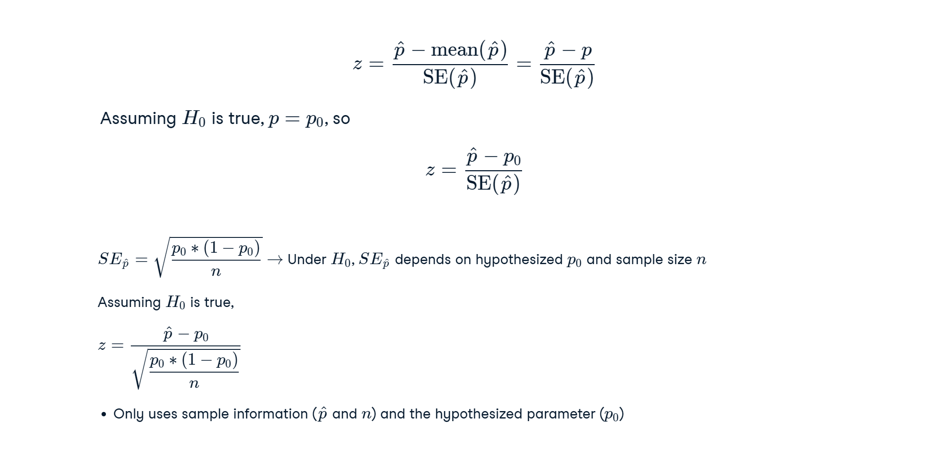

**One-sample proportion test**
>**H0**: Proportion of Stack Overflow users under 30 is 0.5
<br>
**Ha**:Proportion of Stack Overflow users under 30 is not 0.5
<br>
**alpha = 0.01**

In [9]:
stack_overflow_age_cat = stack_overflow['age_cat'].value_counts(normalize = True)

In [10]:
p_hat = stack_overflow_age_cat.iloc[0]
p_hat

0.5356037151702786

In [11]:
p_0 = 0.5

In [12]:
n = len(stack_overflow)
n

2261

In [13]:
# calculate z-score
numerator = p_hat - p_0
denominator = np.sqrt(p_0 * (1 - p_0)/n)
z_score = numerator / denominator
print('z score is', z_score)

z score is 3.385911440783663


In [ ]:
# p_value = norm.cdf(-z_score) + 1 - norm.cdf(z_score)

In [15]:
# calculate P-value
from scipy.stats import norm
p_value = 2 * (1 - norm.cdf(z_score))
print('p_value is', p_value)

p_value is 0.0007094227368100725


In [17]:
p_value <= alpha
# P_vaue < alpha = 0.01, reject H0

True

In [28]:
# test for single proportion
# Hypothesize that the proportion of late shipments is 6%
p_0 = 0.06

# Calculate the sample proportion of late shipments
p_hat = (late_shipments['late'] == "Yes").mean()

# Calculate the sample size
n = len(late_shipments)

# Calculate the numerator and denominator of the test statistic
numerator = p_hat - p_0
denominator = np.sqrt(p_0 * (1 - p_0) / n)

# Calculate the test statistic
z_score = numerator / denominator

# Calculate the p-value from the z-score
p_value = 1 - norm.cdf(z_score)

# Print the p-value
print(p_value)

0.44703503936503364


### 3.2 Two-sample proportion tests
- assuming H0 is true, p_0  = 0
>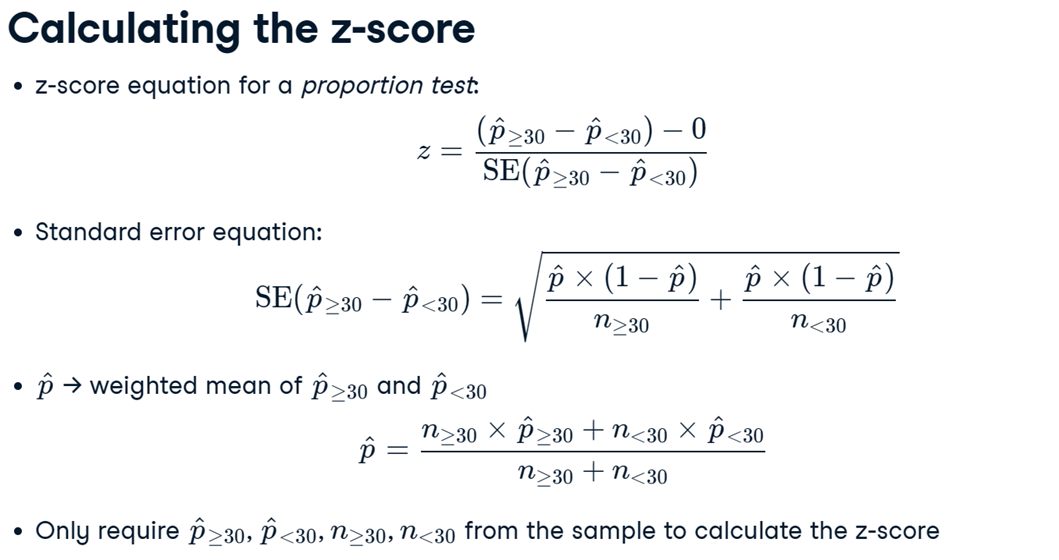

**Compare two proportions**
>**H0**: Proportion of hobbyist users is the same for those under 30 as those at least 30 -> *P>=30 - P<30 = 0*
<br>
**Ha**:Proportion of hobbyist users is different for those under 30 to those at least 30 -> *P>= 30 - P<30 <> 0*
<br>
**alpha = 0.05**

In [3]:
# calculate p_hats
p_hats = stack_overflow.groupby('age_cat')['hobbyist'].value_counts(normalize = True)
p_hats

age_cat      hobbyist
At least 30  Yes         0.773333
             No          0.226667
Under 30     Yes         0.843105
             No          0.156895
Name: hobbyist, dtype: float64

In [29]:
p_hat_at_least_30 = p_hats.iloc[0]
p_hat_under_30 = p_hats.iloc[2]

In [4]:
p_hats[("At least 30","Yes")]

0.7733333333333333

In [30]:
n = stack_overflow.groupby('age_cat')['hobbyist'].count()
n

age_cat
At least 30    1050
Under 30       1211
Name: hobbyist, dtype: int64

In [31]:
n_at_least_30 = n[0]
n_under_30 = n[1]

In [33]:
# calculate z_score
p_hat = (n_at_least_30 * p_hat_at_least_30 + n_under_30 * p_hat_under_30)/(n_at_least_30 + n_under_30)
std_error = np.sqrt((p_hat * (1-p_hat)/n_at_least_30 + p_hat*(1-p_hat)/n_under_30))
z_score = (p_hat_at_least_30 - p_hat_under_30) / std_error
print('z_score is:', z_score)

z_score is: -4.223691463320559


In [39]:
# calculate p_value
p_value = 2 * (1 - norm.cdf(z_score))
print('P-value is:',p_value)

P-value is: 1.9999759666985732


In [40]:
p_value <= alpha # fail to reject H0 

False

**Use proportion_ztest function from statsmodel**
<br> *requires two objects as numpy arrays*
- the number of hobbyists in each age group
- the number of rows in each age group

In [36]:
stack_overflow.groupby('age_cat')['hobbyist'].value_counts()

age_cat      hobbyist
At least 30  Yes          812
             No           238
Under 30     Yes         1021
             No           190
Name: hobbyist, dtype: int64

In [41]:
n_hobbyists = np.array([812, 1021])
n_rows = np.array([812 + 238, 1021 + 190])
from statsmodels.stats.proportion import proportions_ztest
z_score, p_value = proportions_ztest(count=n_hobbyists,nobs = n_rows,
                                    alternative = 'two-sided')
print((z_score, p_value))
print(p_value <=0.05)
# reject the H0
# the years of coding is associated with hobby or not

(-4.223691463320559, 2.403330142685068e-05)
True


**late shipments datasets**

In [ ]:
# Calculate the pooled estimate of the population proportion
p_hat = (p_hats["reasonable"] * ns["reasonable"] + p_hats["expensive"] * ns["expensive"]) / (ns["reasonable"] + ns["expensive"])

# Calculate p_hat one minus p_hat
p_hat_times_not_p_hat = p_hat * (1 - p_hat)

# Divide this by each of the sample sizes and then sum
p_hat_times_not_p_hat_over_ns = p_hat_times_not_p_hat / ns["expensive"] + p_hat_times_not_p_hat / ns["reasonable"]

# Calculate the standard error
std_error = np.sqrt(p_hat_times_not_p_hat_over_ns)

# Calculate the z-score
z_score = (p_hats["expensive"] - p_hats["reasonable"]) / std_error

# Calculate the p-value from the z-score
p_value = 1 - norm.cdf(z_score)

# Print p_value
print(p_value)

*proportions_ztest() for two samples*

In [33]:
late_shipments.columns

Index(['id', 'country', 'managed_by', 'fulfill_via', 'vendor_inco_term',
       'shipment_mode', 'late_delivery', 'late', 'product_group',
       'sub_classification', 'vendor', 'item_description',
       'molecule_test_type', 'brand', 'dosage', 'dosage_form',
       'unit_of_measure_per_pack', 'line_item_quantity', 'line_item_value',
       'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_kilograms', 'freight_cost_usd',
       'freight_cost_groups', 'line_item_insurance_usd'],
      dtype='object')

In [35]:
# Count the late column values for each freight_cost_group
late_by_freight_cost_group = late_shipments.groupby("freight_cost_groups")['late'].value_counts()

# Create an array of the "Yes" counts for each freight_cost_group
success_counts = np.array([45, 16])

# Create an array of the total number of rows in each freight_cost_group
n = np.array([500+45, 439+16])

from statsmodels.stats.proportion import proportions_ztest
# Run a z-test on the two proportions
stat, p_value = proportions_ztest(count =success_counts, nobs = n, alternative = 'larger')


# Print the results
print(stat, p_value)

3.1190401865206128 0.0009072060637051224


### 3.3 Chi-square test of independence
- **proportion test for multi-groups**
- Test for independence of variables
  - if the proportion of hobbies was the same for the category, the variables would be considered statistically independent. 
- **degree of freedom(df): (No. of response categories - 1) * (No. of explanatory categories -1)**
- In Chi2 test, observed and expected counts squared must be **non-negative**  -> means Chi2 tests are almost always right-tailed tests
- Like the t-distribution, the chi-square distribution has degrees of freedom and non-centrality parameters. When these numbers are large, the chi-square distribution can be approximated by a normal distribution.
> **Statistical independence**:proportion of successes in the response variable is the same across all categories of the explanatory variable
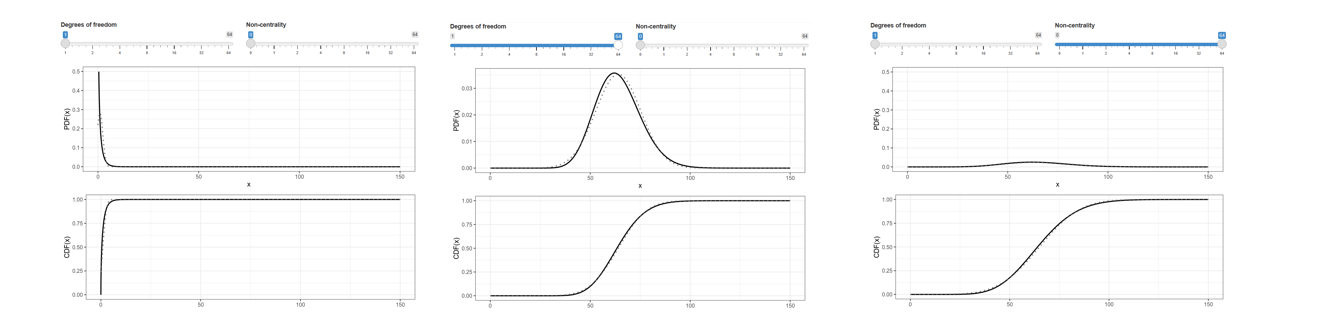

In [37]:
# correction argument specifies whether or not to apply Yates' continuity correction
# a fudge factor, 
expected, observed, stats = pingouin.chi2_independence(data = stack_overflow, 
                                                      x = 'hobbyist',
                                                      y = 'age_cat',
                                                      correction = False)
print(stats) 

chi2 = (z_score) ** 2

                 test    lambda       chi2  dof      pval    cramer     power
0             pearson  1.000000  17.839570  1.0  0.000024  0.088826  0.988205
1        cressie-read  0.666667  17.818114  1.0  0.000024  0.088773  0.988126
2      log-likelihood  0.000000  17.802653  1.0  0.000025  0.088734  0.988069
3       freeman-tukey -0.500000  17.815060  1.0  0.000024  0.088765  0.988115
4  mod-log-likelihood -1.000000  17.848099  1.0  0.000024  0.088848  0.988236
5              neyman -2.000000  17.976656  1.0  0.000022  0.089167  0.988694


In [39]:
stack_overflow['age_cat'].value_counts()

Under 30       1211
At least 30    1050
Name: age_cat, dtype: int64

In [40]:
stack_overflow['job_sat'].value_counts()

Very satisfied           879
Slightly satisfied       680
Slightly dissatisfied    342
Neither                  201
Very dissatisfied        159
Name: job_sat, dtype: int64

**Declaring the hypothesis**
<br>
- **Test statistic denoted X^2**
- **Assuming independence, how far away are the observed results from the expected value?**
<br>
-*Age category is the response variable and the job satisfaction is the explanatory variable.*
>- **H0**: age category is independent of job satisfaction
>- **Ha**: age category is not independent of job satisfaction

In [46]:
alpha = 0.1

In [42]:
props = stack_overflow.groupby('job_sat')['age_cat'].value_counts(normalize = True)
props

job_sat                age_cat    
Very dissatisfied      Under 30       0.509434
                       At least 30    0.490566
Slightly dissatisfied  Under 30       0.532164
                       At least 30    0.467836
Neither                Under 30       0.567164
                       At least 30    0.432836
Slightly satisfied     Under 30       0.564706
                       At least 30    0.435294
Very satisfied         Under 30       0.511945
                       At least 30    0.488055
Name: age_cat, dtype: float64

<AxesSubplot:xlabel='job_sat'>

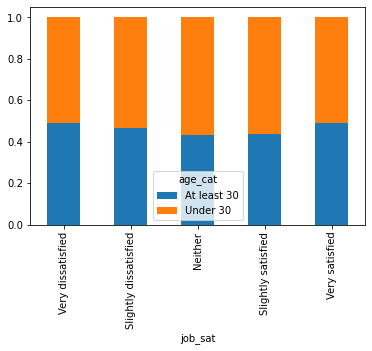

In [43]:
wide_props = props.unstack()
wide_props
wide_props.plot(kind = 'bar', stacked = True)

*Use Chi-squared to test if there is sigificant different between the groups*

In [44]:
# df:(resp no. -1) * (explanatory no. - 1)
df = (2-1) * (5-1)
df

# df = 4, not 1 , so no need for correction

4

In [48]:
expected, observed, stats = pingouin.chi2_independence(data = stack_overflow,
                                                      x='job_sat',
                                                      y='age_cat')
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,5.552373,4.0,0.235164,0.049555,0.437417
1,cressie-read,0.666667,5.554106,4.0,0.235014,0.049563,0.437545
2,log-likelihood,0.000000,5.558529,4.0,0.234632,0.049583,0.437871
3,freeman-tukey,-0.500000,5.562688,4.0,0.234274,0.049601,0.438178
4,mod-log-likelihood,-1.000000,5.567570,4.0,0.233854,0.049623,0.438538
5,neyman,-2.000000,5.579519,4.0,0.232828,0.049676,0.439419


In [49]:
p_value = 0.235164

In [50]:
print(p_value < alpha)
# not reject H0
# Ha: age is independent of job satisfaction

False


**Swapping the variables?**

<AxesSubplot:xlabel='age_cat'>

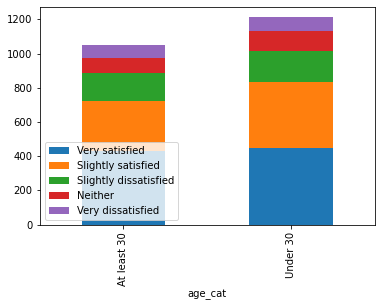

In [51]:
props = stack_overflow.groupby('age_cat')['job_sat'].value_counts()
wide_props = props.unstack()
wide_props.plot(kind='bar', stacked = True)

In [52]:
expected, observed, stats = pingouin.chi2_independence(data = stack_overflow,
                                                      x = 'age_cat',
                                                       y= 'job_sat')
r = stats[stats['test']=='pearson']
r

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.0,5.552373,4.0,0.235164,0.049555,0.437417


In [53]:
p_value = r['pval']
print(p_value)
p_value < alpha 
# not reject H0

0    0.235164
Name: pval, dtype: float64


0    False
Name: pval, dtype: bool

**Thus, we can phase the question as "are x and y are independent"?**

**late_shipment datasetz**

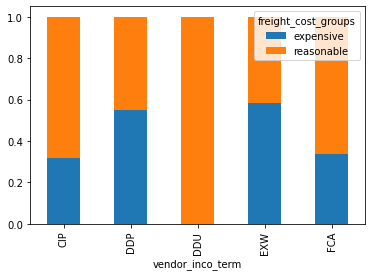

      test  lambda       chi2  dof          pval    cramer     power
0  pearson     1.0  34.805072  4.0  5.093922e-07  0.186561  0.999235


C:\Users\QXJ\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
C:\Users\QXJ\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on expected frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
C:\Users\QXJ\anaconda3\lib\site-packages\scipy\stats\stats.py:6716: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
C:\Users\QXJ\anaconda3\lib\site-packages\scipy\stats\stats.py:6716: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
C:\Users\QXJ\anaconda3\lib\site-packages\scipy\stats\stats.py:6713: RuntimeWarning: divide by zero encountered in true_divide
  terms = 2.0 * special.xlogy(f_exp, f_exp / f_obs)


In [56]:
# Proportion of freight_cost_group grouped by vendor_inco_term
props = late_shipments.groupby('vendor_inco_term')['freight_cost_groups'].value_counts(normalize=True)

# Convert props to wide format
wide_props = props.unstack()

# Proportional stacked bar plot of freight_cost_group vs. vendor_inco_term
wide_props.plot(kind="bar", stacked=True)
plt.show()

# Determine if freight_cost_group and vendor_inco_term are independent
expected, observed, stats = pingouin.chi2_independence(data= late_shipments, x='freight_cost_groups', y='vendor_inco_term' )

# Print results
print(stats[stats['test'] == 'pearson']) 

- *Reject the null hypothesis and conclude that vendor_inco_term and freight_cost_group are associated.*

### 3.4 Chi-square goodness of fit tests
- another variant of the Chi2 to **compare a single categorical variable to a hypothesized distribution**
 - define a hypothesis distribution 
 - use chi-square() to compare the observed distribution to hypothesized one to see if they match 

Purple links
> **How do you feel when you discover that you've already visited the top resource?**

In [58]:
purple_link_counts = stack_overflow['purple_link'].value_counts()
purple_link_counts

Hello, old friend    1225
Indifferent           405
Amused                368
Annoyed               263
Name: purple_link, dtype: int64

In [60]:
# rename the left axis, name the counts and sort the values 
purple_link_counts =purple_link_counts.rename_axis('purple_link').reset_index(name ='n')\
.sort_values('purple_link')

purple_link_counts

,purple_link,n
2,Amused,368
3,Annoyed,263
0,"Hello, old friend",1225
1,Indifferent,405


In [61]:
# declaring the hypotheses
hypothesized = pd.DataFrame({
    'purple_link':['Amused', 'Annoyed', 'Hello, old friend', 'Indifferent'],
    'prop':[1/6 ,1/6, 1/2, 1/6]
})
hypothesized

,purple_link,prop
0,Amused,0.166667
1,Annoyed,0.166667
2,"Hello, old friend",0.500000
3,Indifferent,0.166667


**X2 measures how far the observed sample distribtion of proportions is from the hypothesized distribution?**
>**H0**:The sample matches the hypothesized distribution
<br>
**Ha**:The sample dose not match the hypothesized distribution

In [62]:
alpha = 0.1

In [63]:
# get hypothesized counts
n_total = len(stack_overflow)
print(n_total)
hypothesized['n'] = hypothesized['prop'] * n_total
hypothesized

2261


,purple_link,prop,n
0,Amused,0.166667,376.833333
1,Annoyed,0.166667,376.833333
2,"Hello, old friend",0.500000,1130.500000
3,Indifferent,0.166667,376.833333


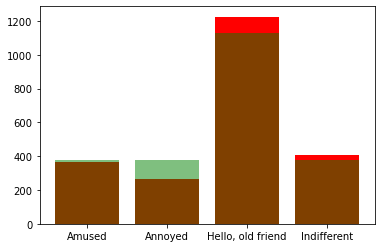

In [65]:
# observed counts
plt.bar(purple_link_counts['purple_link'], purple_link_counts['n'], 
        color ='red', label='Observed')
plt.bar(hypothesized['purple_link'], hypothesized['n'], alpha = 0.5,
        color ='green', label='Hypothesized')
plt.show()

In [67]:
# test how well our hypothesized data fits the observed data
from scipy.stats import chisquare
gof_test = chisquare(f_obs = purple_link_counts['n'], f_exp = hypothesized['n'])
gof_test

Power_divergenceResult(statistic=44.59840778416629, pvalue=1.1261810719413759e-09)

In [68]:
p_value = 1.1261810719413759e-09
print(p_value < alpha)
# reject H0, in favor of Ha

True


- *the sample distribution of proportions is different from the hypothesized distribution*

**late shipment dataset**

In [ ]:
# Find the number of rows in late_shipments
n_total = len(late_shipments)

# Create n column that is prop column * n_total
hypothesized["n"] = hypothesized["prop"] * n_total

# Plot a red bar graph of n vs. vendor_inco_term for incoterm_counts
plt.bar(incoterm_counts['vendor_inco_term'], incoterm_counts['n'], color="red", label="Observed")

# Add a blue bar plot for the hypothesized counts
plt.bar(hypothesized['vendor_inco_term'], hypothesized['n'], alpha = 0.5,color="blue", label="Hypothesized")
plt.legend()
plt.show()

In [ ]:
# Perform a goodness of fit test on the incoterm counts n
gof_test = chisquare(f_obs = incoterm_counts['n'], f_exp = hypothesized['n'])

# Print gof_test results
print(gof_test)

## 4. Non-Parametric Tests
- Parametric tests: assumptions, consequences and solutions
- Non parametric tests: 
 - Wilcoxon-signed rank test: paired t-test
 - Wilcoxon-Mann_Whitney test (Mann Whitney U test): unpaired t-tests
 - Kruskal-Wallis test: ANOVA test

### 4.1 Assumptions in hypothesis testing
- Each hypothesis test, we made assumptions about the data
- It is only when these assumptions are met, it is appropriate to use hypothesis test
1. **Randomness**
**Assumption**
> The samples are readom subsets of larger population 


**Consequence**: Sample is not representative of population
<br>
**How to check this**:
- Understand how your data was collected 
- Speak to the data collector/domain expert


2. **Independence of observations**
**Assumption**
> Each observation(row) in the dataset is independent


**Consequence**: Increase chance of false negative/positive errors.
<br>
**How to check this**:
- Understand how your data was collected 

3. Large sample size
**Assumption**
> The samples is big enough to mitigate uncertainty, so that the Central Limit Theorem applies. -> can be assumed to be normal distribution


**Consequence**: 
- Wider confidence intervals 
- Increased chance of false negative/positve errors
<br>

**How to check this**:
- It depends on the test
>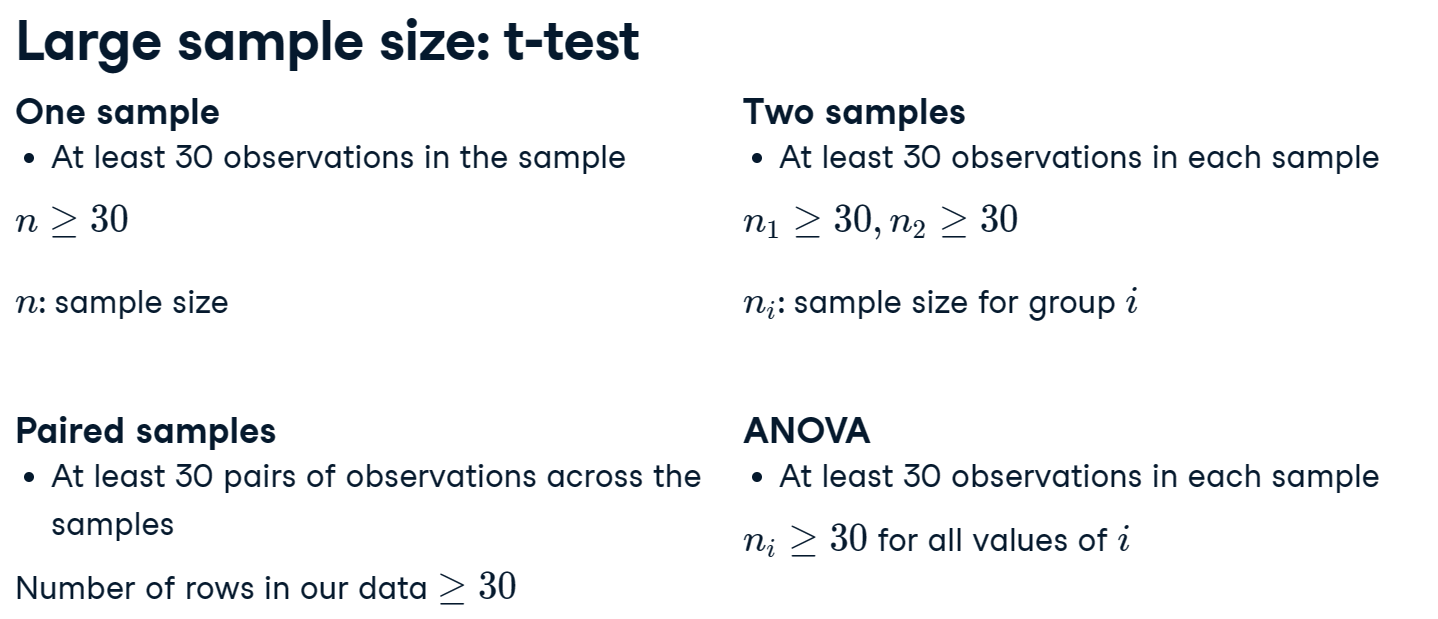
 - *The paired samples can be below 30 pairs but the important is null distribution appears normal*
>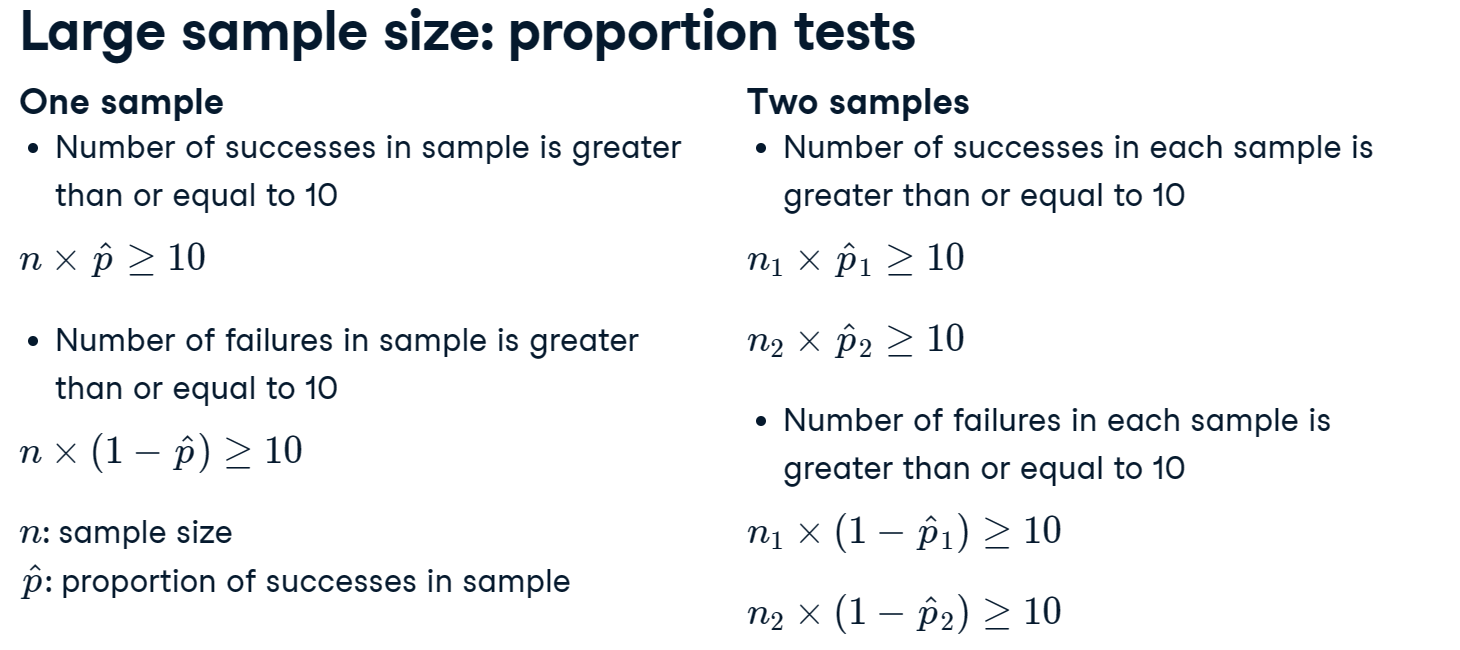
>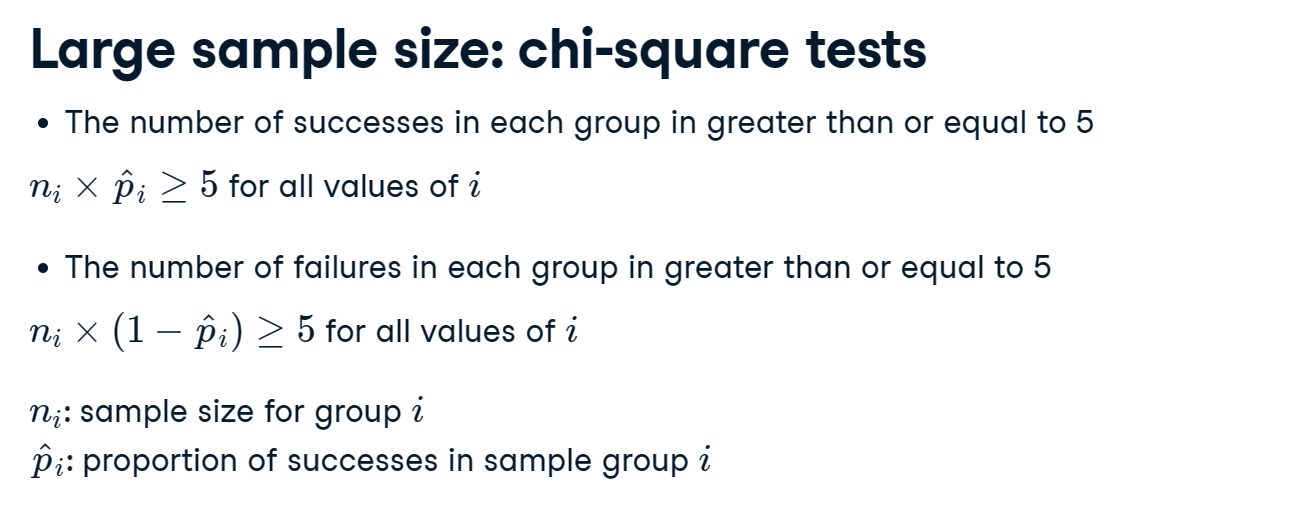

> **Inspect whether the counts are big enough ->
print((counts >= 30).all())**

**Sanity check**
> if the bootstrap distribution does not look normal, assumptions likely are not valid. 
- Revisit data collection to check for **randomness, independence and sample size**

In [70]:
# test sample size
# for two sample t_test
# Count the freight_cost_group values
counts = late_shipments['freight_cost_groups'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 30).all())

expensive     531
reasonable    455
Name: freight_cost_groups, dtype: int64
True


In [71]:
# One sample proportion test: 
# When working with categorical data to compare the proportion of one or more groups, 
# use 10 as the cutoff point.
# Count the late values
counts = late_shipments['late'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 10).all())

No     939
Yes     61
Name: late, dtype: int64
True


In [73]:
# for a Chisquare independence test
# Count the values of freight_cost_group grouped by vendor_inco_term
counts = late_shipments.groupby(['vendor_inco_term'])['freight_cost_groups'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 5).all())

vendor_inco_term  freight_cost_groups
CIP               reasonable              34
                  expensive               16
DDP               expensive               55
                  reasonable              45
DDU               reasonable               1
EXW               expensive              423
                  reasonable             302
FCA               reasonable              73
                  expensive               37
Name: freight_cost_groups, dtype: int64
False


In [74]:
# for ANOVA test
# Count the shipment_mode values
counts = late_shipments['shipment_mode'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 30).all())

Air            906
Ocean           88
Air Charter      6
Name: shipment_mode, dtype: int64
False


### 4.2 Non-parametric tests
- z-test, t-test and ANOVA are all parametric tests, all based on 
 - assuming that the population is normal distributed
 - require sufficiently large sample sizes 
- In situations we are not sure about those assumptions, we use non_parametric tests: 
  - Non-parametric tests avoid the parametric assumptions and conditions
  - Many non_parametric tests use **ranks** of the data
  - Non-parametric tests are more reliable than parametric tests for **small sample sizes** and when data **isn't normally distributed**

In [80]:
# to give rank for each element in a list
x = [1,15,3,10,6]

from scipy.stats import rankdata
rankdata(x)

array([1., 5., 2., 4., 3.])

### Wilcoxon-signed rank test
- Developed by Frank Wilcoxon in 1945
- One of the first non-parametric procedures
- Works on the ranked absolute differences between the pairs of data 
  - calculate the paired differences
  - get the absolute number of the differences
  - rank the absolute number 
  - add the rank number, get T_plus and T_minus
  - get the minimal value to those Ts = W 
  - compare W to alpha
- pingouin.wilcoxon()

In [77]:
repub_votes_potus_08_12.shape

(100, 4)

In [84]:
county = ['Red River', 'Walker', 'Powell', 'Schleicher', 'Morgan']
repub_votes_small = repub_votes_potus_08_12[repub_votes_potus_08_12['county'].isin(county)]
repub_votes_small = repub_votes_small.reset_index(drop=True)

**The 2008 republican % are smaller than 2012?**

In [85]:
repub_votes_small

# this dataset is too small, cannot fulfill the condition of the sample size of paramatric test

,state,county,repub_percent_08,repub_percent_12
0,Georgia,Walker,72.678617,74.200767
1,Kentucky,Powell,57.059533,61.727293
2,Montana,Powell,57.244898,65.057637
3,Texas,Red River,68.507522,69.944817
4,Texas,Schleicher,74.386503,77.384464
5,Texas,Walker,60.707197,64.971903
6,West Virginia,Morgan,60.857614,64.068711


*1. get the difference of the comparing columns*

In [86]:
repub_votes_small['diff'] = repub_votes_small['repub_percent_08'] - repub_votes_small['repub_percent_12']
repub_votes_small.head(2)

,state,county,repub_percent_08,repub_percent_12,diff
0,Georgia,Walker,72.678617,74.200767,-1.52215
1,Kentucky,Powell,57.059533,61.727293,-4.66776


*2. get the absolute number of the difference*

In [87]:
repub_votes_small['diff_abs'] = repub_votes_small['diff'].abs()
repub_votes_small

,state,county,repub_percent_08,repub_percent_12,diff,diff_abs
0,Georgia,Walker,72.678617,74.200767,-1.522150,1.522150
1,Kentucky,Powell,57.059533,61.727293,-4.667760,4.667760
2,Montana,Powell,57.244898,65.057637,-7.812739,7.812739
3,Texas,Red River,68.507522,69.944817,-1.437295,1.437295
4,Texas,Schleicher,74.386503,77.384464,-2.997961,2.997961
5,Texas,Walker,60.707197,64.971903,-4.264705,4.264705
6,West Virginia,Morgan,60.857614,64.068711,-3.211097,3.211097


*3. rank the absolute difference*

In [90]:
from scipy.stats import rankdata
repub_votes_small['rank_abs_diff'] = rankdata(repub_votes_small['diff_abs'])
repub_votes_small

,state,county,repub_percent_08,repub_percent_12,diff,diff_abs,rank_abs_diff
0,Georgia,Walker,72.678617,74.200767,-1.522150,1.522150,2.0
1,Kentucky,Powell,57.059533,61.727293,-4.667760,4.667760,6.0
2,Montana,Powell,57.244898,65.057637,-7.812739,7.812739,7.0
3,Texas,Red River,68.507522,69.944817,-1.437295,1.437295,1.0
4,Texas,Schleicher,74.386503,77.384464,-2.997961,2.997961,3.0
5,Texas,Walker,60.707197,64.971903,-4.264705,4.264705,5.0
6,West Virginia,Morgan,60.857614,64.068711,-3.211097,3.211097,4.0


In [92]:
# incorporate the sum of the ranks for negative and positive differences
# W uses the signs of the diff column to split the ranks into 2 groups
# one for rows with negative difference and one for positve difference
# T_minus is defined as the sum of ranks with negative 
# T_plus is defined as the sum of ranks with positive 
T_plus = 0
T_minus = 2 + 6 + 7 + 1 + 3 + 5 + 4
W = np.min([T_minus, T_plus])
W

0

**Use pingouin.wilcoxon to calculate W**

In [93]:
alpha = 0.01
pingouin.wilcoxon( x = repub_votes_small['repub_percent_08'],
                 y = repub_votes_small['repub_percent_12'],
                 alternative = 'less')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,0.0,less,0.007812,-1.0,0.693878


In [94]:
p_value = 0.007812
p_value < alpha
# Reject H0
# we have evidence that the 2008 republican % are smaller than 2012

True

### 4.3 Non-parametric ANOVA and unpaired t-tests: to test independent of numeric dataset 
#### Wilcoxon-Mann_Whitney test (Mann Whitney U test)
- **A t-test on the ranks of the numeric input** 
- works on unpaired data
 - Convert out data from long to wide
 - Use pingouin.mwu to run the test

**stack overflow test**

In [95]:
age_vs_comp = stack_overflow[['converted_comp','age_first_code_cut']]
age_vs_comp

,converted_comp,age_first_code_cut
0,77556.0,adult
1,74970.0,child
2,594539.0,child
3,2000000.0,adult
4,37816.0,adult
...,...,...
2256,145000.0,child
2257,33972.0,child
2258,97284.0,child
2259,72000.0,child


In [96]:
age_vs_comp_wide = age_vs_comp.pivot(columns = 'age_first_code_cut',
                                    values = 'converted_comp')
age_vs_comp_wide

age_first_code_cut,adult,child
0,77556.0,NaN
1,NaN,74970.0
2,NaN,594539.0
3,2000000.0,NaN
4,37816.0,NaN
...,...,...
2256,NaN,145000.0
2257,NaN,33972.0
2258,NaN,97284.0
2259,NaN,72000.0


In [99]:
alpha = 0.1

stats = pingouin.mwu(x = age_vs_comp_wide['child'],
            y = age_vs_comp_wide['adult'],
            alternative = 'greater')
stats

,U-val,alternative,p-val,RBC,CLES
MWU,744365.5,greater,1.902723e-19,-0.222516,0.611258


In [100]:
stats['p-val'] <= alpha 

MWU    True
Name: p-val, dtype: bool

- *Reject H0, adult comp is greater than child*

#### Kruskal-Wallis test
*Non-parametric test - Kruskal-Wallis test - is extending to Wilcoxon-Mann-Whitney test to multiple groups as ANOVA is to t-test*
- pingouin.kruskal

In [105]:
alpha = 0.01
stats = pingouin.kruskal(data = stack_overflow,
                dv='converted_comp',
                between = 'job_sat')
stats

,Source,ddof1,H,p-unc
Kruskal,job_sat,4,72.814939,5.772915e-15


In [106]:
p_value = stats['p-unc']
p_value < alpha
# reject H0, in favor of Ha
# Ha: there is at least one of the mean salary is significant different from the others across those groups

Kruskal    True
Name: p-unc, dtype: bool

**late shipment dataset**

*Is it a difference in weight_kilograms when the shipment was late and on-time*

In [107]:
# Select the weight_kilograms and late columns
weight_vs_late = late_shipments[['weight_kilograms','late']]

# Convert weight_vs_late into wide format
weight_vs_late_wide = weight_vs_late.pivot(columns='late', 
                                           values='weight_kilograms')


# Run a two-sided Wilcoxon-Mann-Whitney test on weight_kilograms vs. late
wmw_test = pingouin.mwu(x=weight_vs_late_wide['No'],y = weight_vs_late_wide['Yes'], alternative = 'two-sided')



# Print the test results
print(wmw_test)

       U-val alternative     p-val       RBC      CLES
MWU  19134.0   two-sided  0.000014  0.331902  0.334049


*Run a Kruskal-Wallis test on weight_kilograms between the different shipment modes in late_shipments.*

In [108]:
# Run a Kruskal-Wallis test on weight_kilograms vs. shipment_mode
kw_test = pingouin.kruskal(data = late_shipments,
dv = 'weight_kilograms', between = 'shipment_mode')



# Print the results
print(kw_test)

                Source  ddof1           H         p-unc
Kruskal  shipment_mode      2  125.096618  6.848799e-28
